<a href="https://colab.research.google.com/github/sledhead/simple_python/blob/main/opencv_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#Will display upload box to user to allow a file to upload and encrypted.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-contrib-python

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
nemo = cv2.imread('/content/drive/MyDrive/Expense_Rec/car_highway.jpg')
plt.imshow(nemo)
plt.show()

In [ ]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

In [ ]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2GRAY)
plt.imshow(nemo)
plt.show()

In [ ]:
len(flags)

346

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

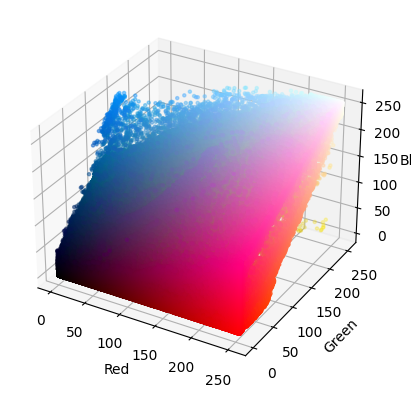

In [ ]:
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [ ]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

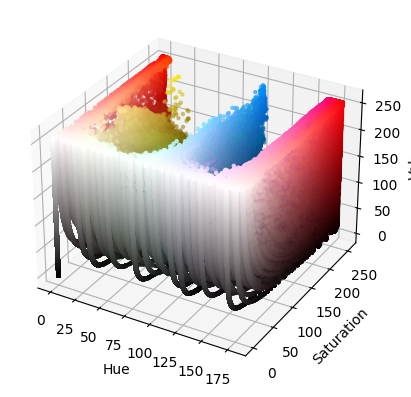

In [ ]:
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [ ]:
light_black = (100, 200, 50)
dark_black = (175, 250, 150)
lower_red = np.array([30,150,50])
#upper_red = np.array([255,255,180])
upper_red = np.array([255,255,225])
mask = cv2.inRange(hsv_nemo, lower_red, upper_red)

In [ ]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)

In [ ]:
result

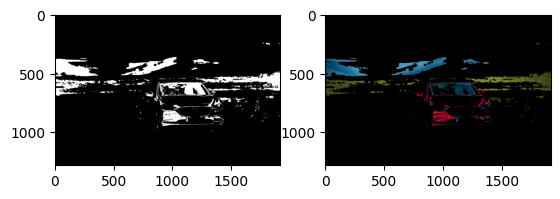

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

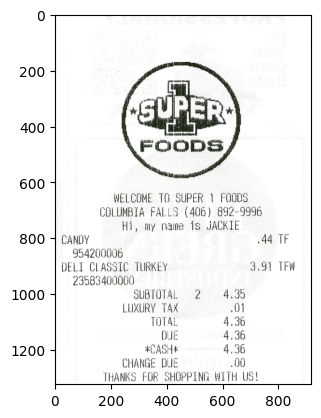

In [5]:
nemo2 = cv2.imread('/content/drive/MyDrive/Expense_Rec/super_one_fb_7.png')
plt.imshow(nemo2)
plt.show()

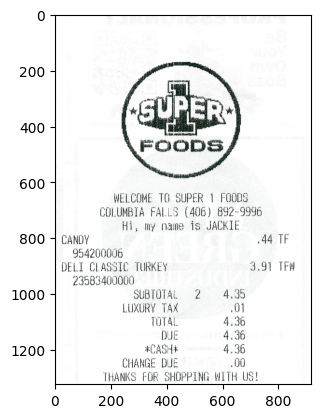

In [6]:
nemo2 = cv2.cvtColor(nemo2, cv2.COLOR_BGR2RGB)
plt.imshow(nemo2)
plt.show()

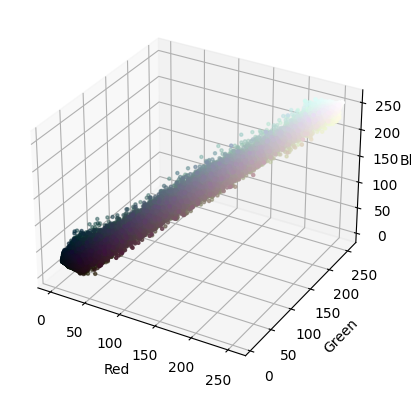

In [7]:
r, g, b = cv2.split(nemo2)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = nemo2.reshape((np.shape(nemo2)[0]*np.shape(nemo2)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [8]:
hsv_nemo2 = cv2.cvtColor(nemo2, cv2.COLOR_RGB2HSV)

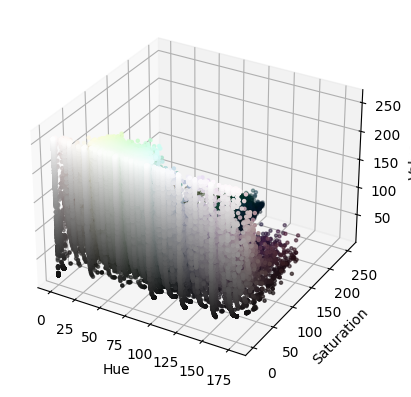

In [9]:
h, s, v = cv2.split(hsv_nemo2)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [10]:

lower_red = np.array([5,30,1])
#upper_red = np.array([255,255,180])
upper_red = np.array([255,255,90])
mask2 = cv2.inRange(hsv_nemo2, lower_red, upper_red)

In [11]:
result2 = cv2.bitwise_and(nemo2, nemo2, mask=mask2)

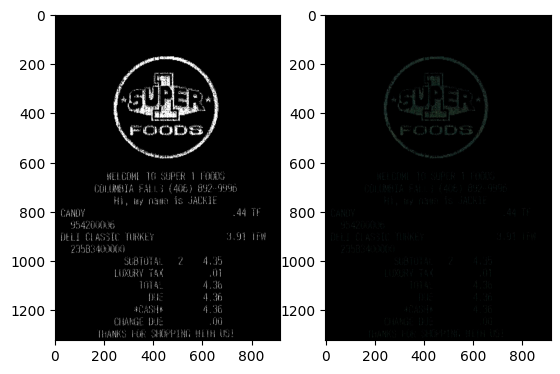

In [12]:
plt.subplot(1, 2, 1)
plt.imshow(mask2, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result2)
plt.show()

In [13]:
result2.ndim
result2.shape

(1323, 917, 3)

In [ ]:
print(type(nemo2))

<class 'numpy.ndarray'>


In [ ]:
result2[400,400,:]

array([0, 0, 0], dtype=uint8)

In [ ]:
mask2[400,400:425]

array([  0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0, 255,
       255, 255,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0],
      dtype=uint8)

In [ ]:
temp_arr = mask2[400,400:405]
temp_arr.max()

0

In [ ]:
nemo2[400,400,:]

array([247, 247, 246], dtype=uint8)

In [ ]:
result2.shape[0]

1323

In [14]:
#build a dict of hor lines between the different areas
line_num = 'line_'
complete_line_nm = ''
line_dict = {}
line_info = {}
bLookForEndLine = False

for line_id in range(0,result2.shape[0],1):
  #loop each hor line
  test_row_arr = mask2[line_id]
  if( (test_row_arr.max() == 255) and (bLookForEndLine == False) ):
    #found begin line
    line_info = {}
    line_info['start_line'] = line_id
    complete_line_nm = line_num + str(line_id)
    bLookForEndLine = True

  if( (test_row_arr.max() == 0) and (bLookForEndLine == True) ):
    #Found end of box line... record line num and restore search
    line_info['end_line'] = line_id
    line_dict[complete_line_nm] = line_info
    bLookForEndLine = False



In [15]:
print(len(line_dict))
for item in line_dict.items():
  print(item)


#print(line_dict)

15
('line_171', {'start_line': 171, 'end_line': 588})
('line_640', {'start_line': 640, 'end_line': 676})
('line_688', {'start_line': 688, 'end_line': 728})
('line_739', {'start_line': 739, 'end_line': 777})
('line_787', {'start_line': 787, 'end_line': 824})
('line_838', {'start_line': 838, 'end_line': 872})
('line_885', {'start_line': 885, 'end_line': 921})
('line_936', {'start_line': 936, 'end_line': 971})
('line_984', {'start_line': 984, 'end_line': 1020})
('line_1033', {'start_line': 1033, 'end_line': 1068})
('line_1082', {'start_line': 1082, 'end_line': 1115})
('line_1131', {'start_line': 1131, 'end_line': 1165})
('line_1181', {'start_line': 1181, 'end_line': 1214})
('line_1229', {'start_line': 1229, 'end_line': 1264})
('line_1278', {'start_line': 1278, 'end_line': 1314})


array([[[248, 248, 248],
        [250, 250, 250],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[249, 250, 250],
        [251, 251, 251],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [252, 252, 252],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[251, 251, 251],
        [251, 251, 251],
        [250, 250, 250],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[252, 252, 252],
        [251, 251, 251],
        [250, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
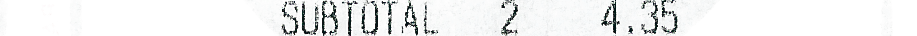

In [17]:
nemo2[984:1020,:,:]

In [ ]:
#output location for each image slice
import os
main_folder_path = '/content/drive/MyDrive/Expense_Rec/slice_output'
file_name_template = 'slice_test_'
file_lst_key = 'file_no_'

for item in line_dict.items():
  print('working on line: ')
  print(item[0])

  #get slice of whole array
  start_index = item[1]['start_line']
  end_index = item[1]['end_line']
  print(f'the start index: {start_index}')
  slice_arr = nemo2[(start_index-2):(end_index+2),:,:]

  #build new file name
  full_file_name = file_name_template + str(start_index) + '.jpg'
  total_path = os.path.join(main_folder_path,full_file_name)
  cv2.imwrite(total_path,slice_arr)

In [25]:
def build_filename(dict_slice):
  line_nm = dict_slice['start_line']
  full_file_name = file_name_template + str(line_nm) + '.jpg'
  return full_file_name

batch_info_dict = {key:build_filename(value) for (key,value) in line_dict.items()}

In [26]:
#output the dict as a json file for later processing
import json

#json_file_data = json.dumps(batch_info_dict)
complete_batch_file_path = 'batch_file_info.json'
full_batch_file_path = os.path.join(main_folder_path, complete_batch_file_path)

with open( full_batch_file_path, 'w') as f:
  json.dump(batch_info_dict, f)

for item in batch_info_dict.items():
  print(item)

('line_171', 'slice_test_171.jpg')
('line_640', 'slice_test_640.jpg')
('line_688', 'slice_test_688.jpg')
('line_739', 'slice_test_739.jpg')
('line_787', 'slice_test_787.jpg')
('line_838', 'slice_test_838.jpg')
('line_885', 'slice_test_885.jpg')
('line_936', 'slice_test_936.jpg')
('line_984', 'slice_test_984.jpg')
('line_1033', 'slice_test_1033.jpg')
('line_1082', 'slice_test_1082.jpg')
('line_1131', 'slice_test_1131.jpg')
('line_1181', 'slice_test_1181.jpg')
('line_1229', 'slice_test_1229.jpg')
('line_1278', 'slice_test_1278.jpg')
